In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('bigmart_data.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [6]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
df1=df.dropna()
df1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
...,...,...,...,...,...,...,...,...,...,...,...,...
8517,FDF53,20.750,reg,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


1. create a line chart to denote the mean price per item.  (plot for top 10 items)



In [8]:
df2=df1.groupby(["Item_Type"])['Item_MRP'].mean().reset_index().sort_values(by="Item_MRP",ascending=False).head(10)
df2

,Item_Type,Item_MRP
15,Starchy Foods,151.256747
9,Household,149.884244
4,Dairy,149.481471
13,Snack Foods,147.569955
12,Seafood,146.595782
6,Fruits and Vegetables,145.418257
1,Breads,141.300639
10,Meat,140.279344
7,Hard Drinks,140.102908
5,Frozen Foods,140.095830


<Axes: xlabel='Item_Type', ylabel='Item_MRP'>

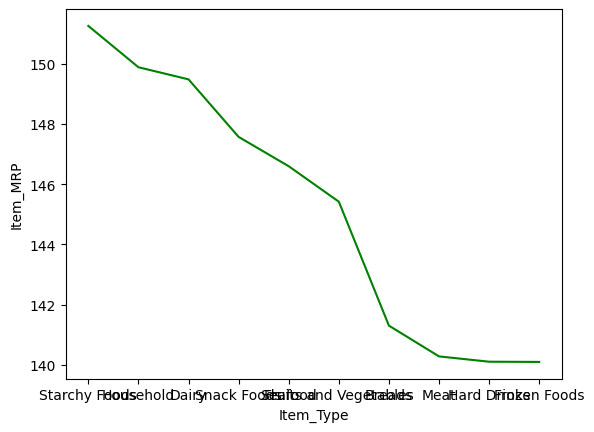

In [9]:
sns.lineplot(x="Item_Type",y="Item_MRP",data=df2,color="green")

2. What is the mean sales for each outlet type? (both bar chart, pie chart )

In [11]:
df3=df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().reset_index()

<Axes: xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

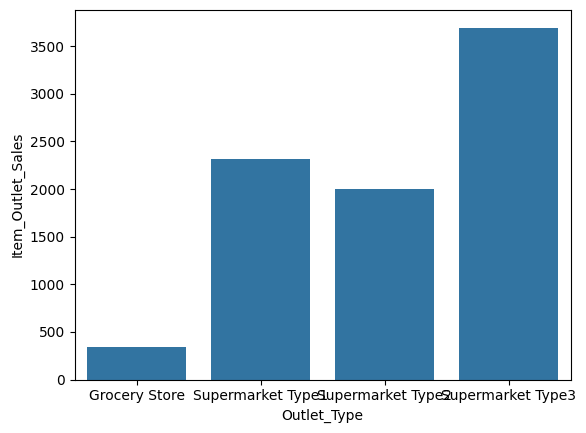

In [12]:
sns.barplot(x="Outlet_Type",y="Item_Outlet_Sales",data=df3)

([<matplotlib.patches.Wedge at 0x1ec2c7b85d0>,
 [Text(1.091011646498503, 0.14033384197913948, 'Grocery Store'),
  Text(0.4715614400595944, 0.9937956571896065, 'Supermarket Type1'),
  Text(-1.017083991974399, 0.4189751224946662, 'Supermarket Type2'),
  Text(0.19716509034388233, -1.0821857174947787, 'Supermarket Type3')],
 [Text(0.595097261726456, 0.07654573198862152, '4.1%'),
  Text(0.2572153309415969, 0.542070358467058, '27.8%'),
  Text(-0.5547730865314904, 0.22853188499709062, '23.9%'),
  Text(0.10754459473302672, -0.5902831186335156, '44.3%')])

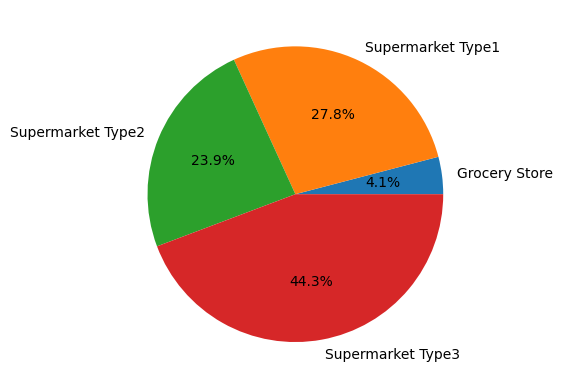

In [14]:
plt.pie(x=df3['Item_Outlet_Sales'],labels=df3['Outlet_Type'],autopct='%.1f%%')

3. Histogram of Item_MRP


<Axes: xlabel='Item_MRP', ylabel='Count'>

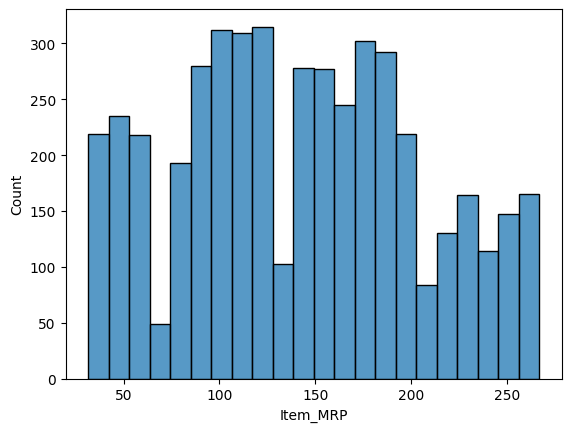

In [17]:
sns.histplot(df1["Item_MRP"])


(array([496., 302., 590., 680., 443., 580., 657., 256., 316., 330.]),
 array([ 31.49   ,  55.02984,  78.56968, 102.10952, 125.64936, 149.1892 ,
        172.72904, 196.26888, 219.80872, 243.34856, 266.8884 ]),
 <BarContainer object of 10 artists>)

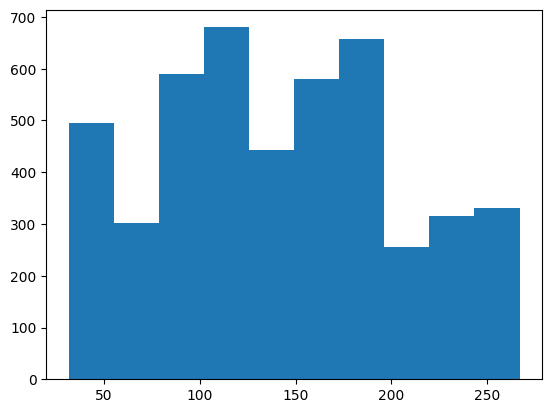

In [18]:
plt.hist(df1["Item_MRP"])

4. Box plot of item weight


<Axes: ylabel='Item_Weight'>

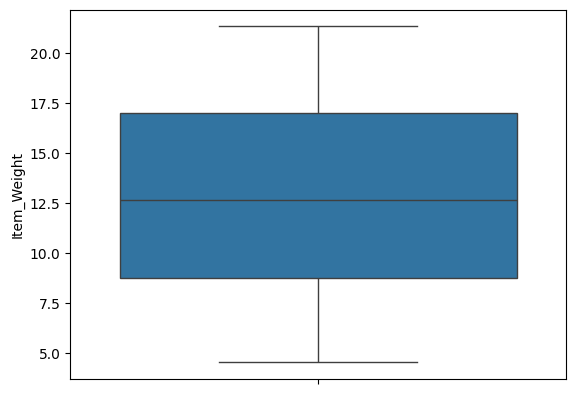

In [16]:
sns.boxplot(df1['Item_Weight'])

5. Relative distribution of item weight and its visibility(scatter plot)


<Axes: >

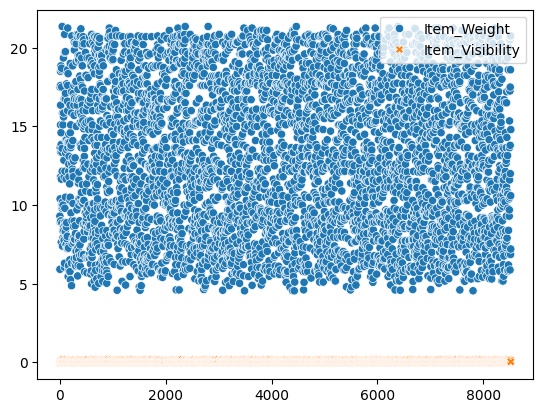

In [25]:
sns.scatterplot(df1[["Item_Weight","Item_Visibility"]])

6. Violin plot for Item_Outlet_Sales


<Axes: ylabel='Item_Outlet_Sales'>

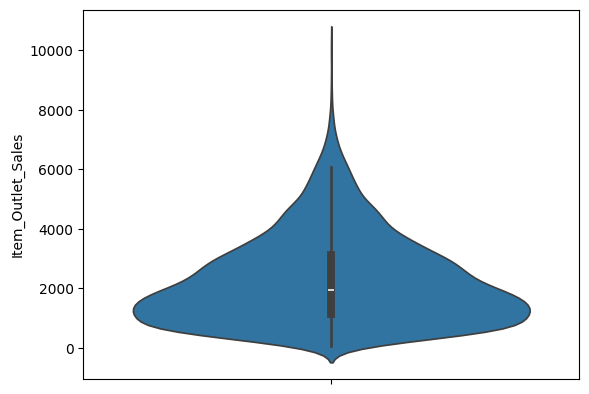

In [23]:
sns.violinplot(df1['Item_Outlet_Sales'])

7. Scatter plot using seaborn and add hue


<Axes: xlabel='Item_Weight', ylabel='Item_Visibility'>

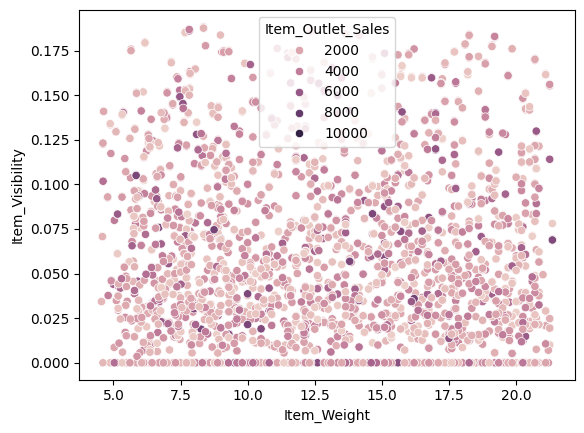

In [28]:
sns.scatterplot(x="Item_Weight",y="Item_Visibility",data=df1,hue="Item_Outlet_Sales")

8. Heat map for selected numeric columns

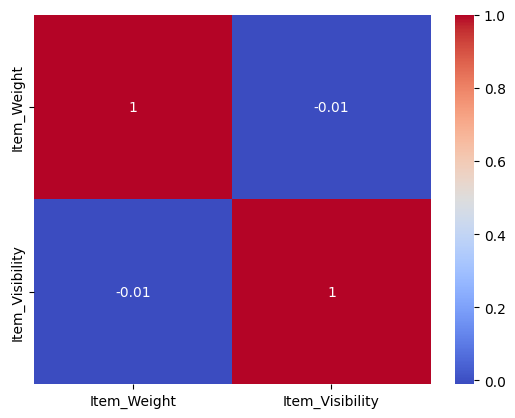

In [32]:
corr = df1[['Item_Weight', 'Item_Visibility']].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()